Première exploration

In [41]:
import pandas as pd
df = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(df.size) # Check the shape of the DataFrame
print(df.shape) # Check the shape of the DataFrame
print(df.head())
print(df.isnull().sum()) # Check for missing values

147903
(7043, 21)
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies   

In [42]:
# Basic Statistics
print(df.describe()) # Check the summary statistics of the DataFrame
print(df["Churn"].value_counts()) # Check the distribution of the target variable

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000
Churn
No     5174
Yes    1869
Name: count, dtype: int64


<Axes: >

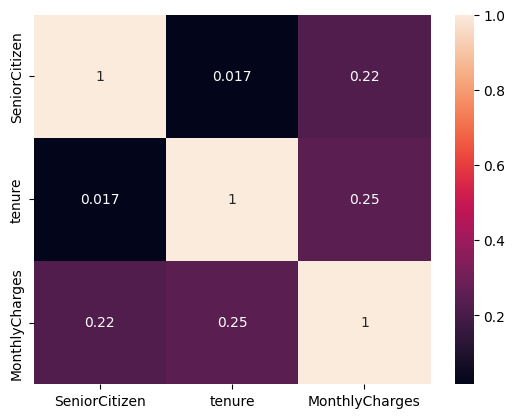

In [43]:
# heatmap : an image or map representing the varying temperature or infrared radiation 
# recorded over an area or during a period of time
# a representation of data in the form of a map or diagram in which data values are represented as colours.
# tenure : titular period of a job or office (ancienneté)
# MonthlyCharges : the amount charged for a month of service
import seaborn as sns
sns.heatmap(df.corr(numeric_only=True), annot=True)

Cleaning

In [44]:
# Cleaning
df.dropna(inplace=True) # Drop rows with missing values
# Categorical encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Churn"] = le.fit_transform(df["Churn"]) # Yes: 1, No: 0
df = pd.get_dummies(df, columns=["InternetService", "Contract"]) # One-hot encoding for categorical variables
print(df.head()) # Check the DataFrame after encoding
print(df.describe()) 

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines OnlineSecurity OnlineBackup  ...  \
0  No phone service             No          Yes  ...   
1                No            Yes           No  ...   
2                No            Yes          Yes  ...   
3  No phone service            Yes           No  ...   
4                No             No           No  ...   

               PaymentMethod MonthlyCharges TotalCharges Churn  \
0           Electronic check          29.85        29.85     0   
1               Mailed check          56.95       

Modelisation

In [45]:
df = df.drop(columns=["customerID"]) 

categorical_cols = ["gender", "Partner", "Dependents", "PhoneService",  
                   "MultipleLines", "OnlineSecurity", "OnlineBackup",  
                   "DeviceProtection", "TechSupport", "StreamingTV",  
                   "StreamingMovies", "PaperlessBilling",  
                   "PaymentMethod"]

# df = pd.get_dummies(df, columns=categorical_cols) # One-hot encoding for categorical variables
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True) # One-hot encoding for categorical variables
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce").fillna(0) # Convert TotalCharges to numeric and fill NaN with 0

print(df.dtypes)
print(df.head()) # Check the DataFrame after encoding
print(df.isnull().sum()) # Check for missing values


SeniorCitizen                              int64
tenure                                     int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int32
InternetService_DSL                         bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
Contract_Month-to-month                     bool
Contract_One year                           bool
Contract_Two year                           bool
gender_Male                                 bool
Partner_Yes                                 bool
Dependents_Yes                              bool
PhoneService_Yes                            bool
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes                          bool
OnlineBackup_No internet service            bool
OnlineBackup_Yes    

In [46]:
# Data Splitting
from sklearn.model_selection import train_test_split

X= df.drop("Churn", axis=1)
Y= df["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42) # Split the data into training and testing sets
print(X_train.shape, y_train.shape) # Check the shape of the training set
print(X_test.shape, y_test.shape) # Check the shape of the testing set
print(X_train.dtypes) # Check the data types of the training set
print(X_test.dtypes) # Check the data types of the testing set
print(y_train.dtypes) # Check the data types of the training set labels
print(y_test.dtypes) # Check the data types of the testing set labels
# print(X_train.head()) # Check the first few rows of the training set
# print(X_test.head()) # Check the first few rows of the testing set
# print(y_train.head()) # Check the first few rows of the training set labels
# print(y_test.head()) # Check the first few rows of the testing set labels

(5634, 32) (5634,)
(1409, 32) (1409,)
SeniorCitizen                              int64
tenure                                     int64
MonthlyCharges                           float64
TotalCharges                             float64
InternetService_DSL                         bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
Contract_Month-to-month                     bool
Contract_One year                           bool
Contract_Two year                           bool
gender_Male                                 bool
Partner_Yes                                 bool
Dependents_Yes                              bool
PhoneService_Yes                            bool
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes                          bool
OnlineBackup_No internet service            bool
OnlineBackup_Yes               

In [47]:
# Data Training
from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier()


model = RandomForestClassifier(class_weight= 'balanced')

model.fit(X_train, y_train) # Train the model on the training set
print("Precision: ", model.score(X_test, y_test)) # Check the accuracy of the model on the testing set
# print(model.predict(X_test)) # Check the predictions of the model on the testing set
# print(model.predict_proba(X_test)) # Check the predicted probabilities of the model on the testing set

# # Data Training v2
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [100, 200],  # Nombre d'arbres  
#     'max_depth': [None, 10, 20],  # Profondeur max des arbres  
#     'min_samples_split': [2, 5]   # Nombre min d'échantillons pour diviser un nœud
#     }

# grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, n_jobs=-1, verbose=2) # Grid search for hyperparameter tuning - cv :cross-validation
# # grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5) # Grid search for hyperparameter tuning
# grid_search.fit(X_train, y_train) # Train the model on the training set
# print("Best parameters: ", grid_search.best_params_) # Check the best parameters
# print("Best score: ", grid_search.best_score_) # Check the best score

# # Data Training v3
# from xgboost import XGBClassifier

# xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss') # XGBoost classifier
# xgb.fit(X_train, y_train) # Train the model on the training set
# print("Precision XGboost: ", xgb.score(X_test, y_test)) # Check the accuracy of the model on the testing set


Precision:  0.7899219304471257


Interprétabilité

In [48]:
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# import matplotlib.pyplot as plt

# cm = confusion_matrix(y_test, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
# disp.plot(cmap="Blues")
# plt.title("Matrice de Confusion")
# plt.show()

Data Visualization

Importance des Features

SeniorCitizen                              int64
tenure                                     int64
MonthlyCharges                           float64
TotalCharges                             float64
InternetService_DSL                         bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
Contract_Month-to-month                     bool
Contract_One year                           bool
Contract_Two year                           bool
gender_Male                                 bool
Partner_Yes                                 bool
Dependents_Yes                              bool
PhoneService_Yes                            bool
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes                          bool
OnlineBackup_No internet service            bool
OnlineBackup_Yes                            bool
DeviceProtection_No 

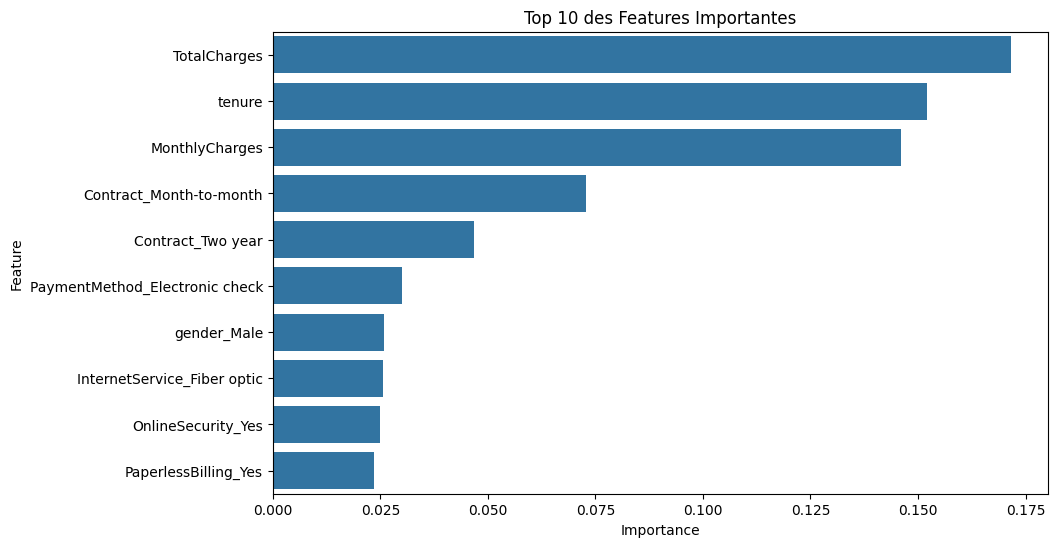

In [49]:
import locale
locale.setlocale(locale.LC_NUMERIC, 'fr_FR.UTF-8')

# Data Preparation for vizualization

y_pred = model.predict(X_test) # Predict the labels for the testing set
y_pred_proba = model.predict_proba(X_test)[:, 1] # Predict the probabilities for the testing set

# create a DataFrame with the predicted values and the actual values
results_df = X_test.copy()
results_df['Churn_actual'] = y_test
results_df['Churn_predicted'] = y_pred
results_df['Churn_Probability'] = y_pred_proba

# results_df['Churn_Probability'] = results_df['Churn_Probability'].astype(float) # Convert the Churn_Probability column to float type
# results_df['Churn_actual'] = results_df['Churn_actual'].astype(float) # Convert the Churn_actual column to float type
# results_df['Churn_predicted'] = results_df['Churn_predicted'].astype(float) # Convert the Churn_predicted column to float type
results_df['Churn_Probability'] = results_df['Churn_Probability'].astype(float)

# important features
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(results_df.dtypes)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10))
plt.title('Top 10 des Features Importantes')
plt.show()

Matrice de confusion

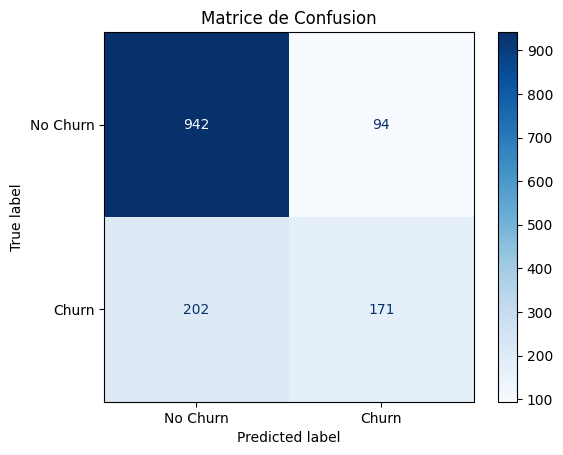

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
disp.plot(cmap="Blues")
plt.title("Matrice de Confusion")
plt.show()

Courbe ROC

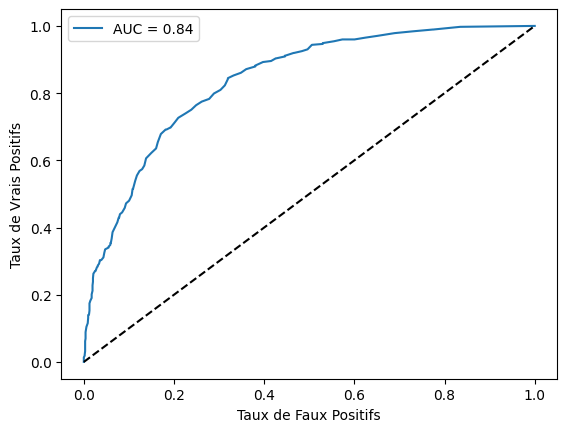

In [51]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc(fpr, tpr)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.legend()
plt.show()

Analyse des Prédictions Incorrectes

In [52]:
errors = results_df[results_df['Churn_actual'] != results_df['Churn_predicted']]
print("Exemples d'erreurs :")
print(errors[['tenure', 'MonthlyCharges', 'Contract_Month-to-month', 'Churn_actual', 'Churn_predicted']].head())

# Statistiques descriptives des erreurs
print("\nStatistiques des erreurs :")
print(errors.describe())

Exemples d'erreurs :
      tenure  MonthlyCharges  Contract_Month-to-month  Churn_actual  \
1263      68           89.60                     True             1   
811       70          104.00                    False             1   
2526       1           19.40                     True             1   
5194      22           89.40                     True             1   
3328       1           70.25                     True             0   

      Churn_predicted  
1263                0  
811                 0  
2526                0  
5194                0  
3328                1  

Statistiques des erreurs :
       SeniorCitizen      tenure  MonthlyCharges  TotalCharges  Churn_actual  \
count     296.000000  296.000000      296.000000    296.000000    296.000000   
mean        0.206081   19.611486       72.154054   1681.971453      0.682432   
std         0.405174   20.023403       25.899179   1947.909693      0.466319   
min         0.000000    1.000000       19.400000     19.4000

Intégration à PowerBI

In [ ]:
# Ajouter les probabilités de churn et les prédictions au dataset original
df_pbi = X_test.copy()
df_pbi['Churn_Predicted'] = y_pred
df_pbi['Churn_Probability'] = model.predict_proba(X_test)[:, 1]  # Probabilité de churn
df_pbi['Churn_Actual'] = y_test  # Si disponible

# Exporter en CSV
df_pbi.to_csv('../data/churn_predictions_powerbi.csv', index=False, sep=';')